# 1.Считываем данные из файла.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('HR.csv', sep=',')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 2. Оценка количества пропусков, расчет базовых статистик для количественных переменных.

In [ ]:
(df.isna().mean() * 100).round(2)

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
department               0.0
salary                   0.0
dtype: float64

In [ ]:
print(df['satisfaction_level'].max())
print(df['satisfaction_level'].min())
print(df['satisfaction_level'].mean())
print(df['satisfaction_level'].median())
print(df['satisfaction_level'].std())
print(df['satisfaction_level'].var())

1.0
0.09
0.6128335222348156
0.64
0.24863065106114257
0.06181720064708763


In [ ]:
print(df['last_evaluation'].max())
print(df['last_evaluation'].min())
print(df['last_evaluation'].mean())
print(df['last_evaluation'].median())
print(df['last_evaluation'].std())
print(df['last_evaluation'].var())

1.0
0.36
0.7161017401160078
0.72
0.17116911062327533
0.02929886443156307


In [ ]:
print(df['number_project'].max())
print(df['number_project'].min())
print(df['number_project'].mean())
print(df['number_project'].median())
print(df['number_project'].std())
print(df['number_project'].var())

7
2
3.80305353690246
4.0
1.2325923553183522
1.519283914389243


In [ ]:
print(df['average_montly_hours'].max())
print(df['average_montly_hours'].min())
print(df['average_montly_hours'].mean())
print(df['average_montly_hours'].median())
print(df['average_montly_hours'].std())
print(df['average_montly_hours'].var())

310
96
201.0503366891126
200.0
49.94309937128408
2494.313174809956


In [ ]:
print(df['time_spend_company'].max())
print(df['time_spend_company'].min())
print(df['time_spend_company'].mean())
print(df['time_spend_company'].median())
print(df['time_spend_company'].std())
print(df['time_spend_company'].var())

10
2
3.498233215547703
3.0
1.4601362305354812
2.131997811722364


# 3. Построение матрицы корреляции, ее визуализация.

In [ ]:
cor_matrix = df[['satisfaction_level', 'last_evaluation','number_project','average_montly_hours','time_spend_company']].corr(method='spearman')

In [ ]:
cor_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154
number_project,0.005786,0.350399,1.000000,0.397855,0.251971
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000


<Axes: >

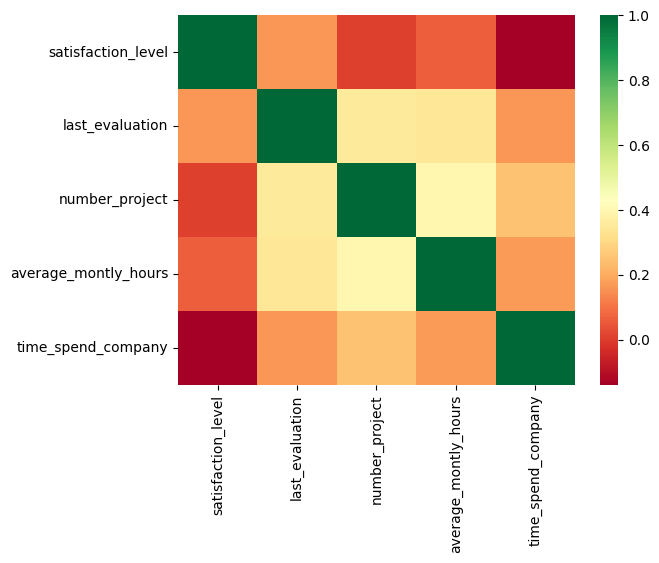

In [ ]:
sns.heatmap(cor_matrix, cmap ='RdYlGn')

# 4. Количество сотрудников по департаментам.

In [ ]:
worker_4 = df.copy()
worker_4 = worker_4.groupby('department').agg({'satisfaction_level':['count']})
worker_4 = worker_4.reset_index()
worker_4.columns = ['dept', 'number_of_workers']

In [ ]:
worker_4

,dept,number_of_workers
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


# 5. Показать распределение сотрудников по зарплатам.

In [ ]:
worker_5 = df.copy()
worker_5 = worker_5.groupby('salary').agg({'satisfaction_level':['count']})
worker_5 = worker_5.reset_index()
worker_5.columns = ['dept', 'number_of_workers']

In [ ]:
worker_5

,dept,number_of_workers
0,high,1237
1,low,7316
2,medium,6446


<Axes: xlabel='dept'>

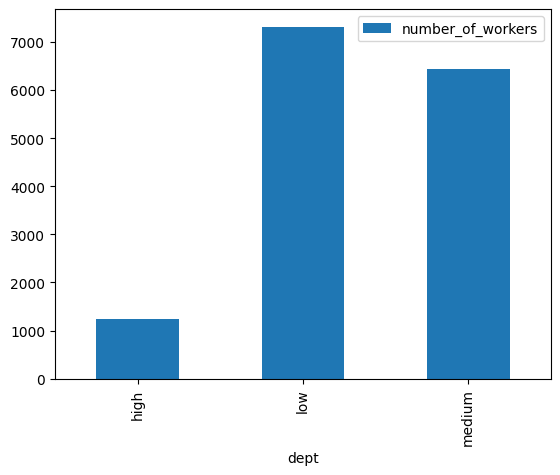

In [ ]:
worker_5[['dept', 'number_of_workers']].plot(x='dept', kind='bar')

# 6.Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [ ]:
worker_6 = df.copy()
worker_6 = worker_6.groupby(['department', 'salary']).agg({'satisfaction_level':['count']})
worker_6 = worker_6.reset_index()
worker_6.columns = ['dept','salary','number_of_workers']

In [ ]:
worker_6 = worker_6.pivot('dept','salary','number_of_workers')

<ipython-input-78-b71d31ddc7c4>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  worker_6 = worker_6.pivot('dept','salary','number_of_workers')


In [ ]:
worker_6

salary,high,low,medium
dept,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


<Axes: ylabel='dept'>

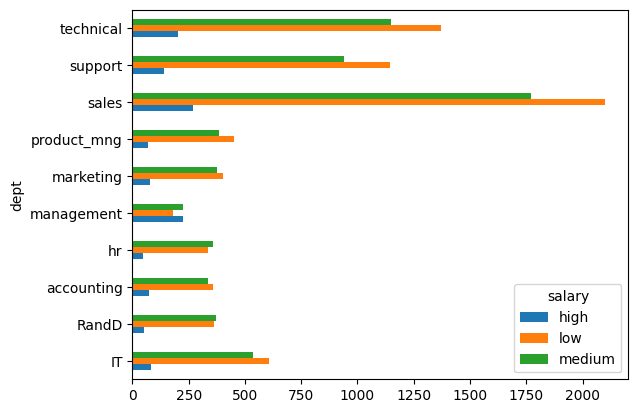

In [ ]:
worker_6.plot.barh()

# 7.Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [ ]:
worker_7 = df.copy()
worker_7 = worker_7.groupby(['salary']).agg({'average_montly_hours':['mean','median']})
worker_7 = worker_7.reset_index()
worker_7.columns = ['salary','number_of_workers','f']

In [ ]:
worker_7

,salary,number_of_workers,f
0,high,199.867421,199.0
1,low,200.996583,199.0
2,medium,201.338349,201.0


In [ ]:
avg_all = df['average_montly_hours'].mean()

In [ ]:
worker_7_1 = df[(df['average_montly_hours']>avg_all)]
worker_7_1 = worker_7_1.groupby(['salary']).agg({'average_montly_hours':['count']})
worker_7_2 = df.copy()
worker_7_2 = worker_7_2.groupby(['salary']).agg({'average_montly_hours':['count']})
worker_7_2 = worker_7_1.merge(worker_7_2, how = 'left', on = 'salary')
worker_7_2.reset_index()
worker_7_2.columns = ['1','2']
worker_7_2['overload_part'] = worker_7_2['1'] / worker_7_2['2']
worker_7_2.drop(['1','2'],axis=1)

,overload_part
salary,
high,0.491512
low,0.488518
medium,0.497518


# 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

In [ ]:
worker_8 = df.copy()

In [ ]:
worker_8_1 = worker_8.groupby(['left']).agg({'satisfaction_level':['mean']})
worker_8_2 = worker_8.groupby(['left']).agg({'number_project':['mean']})
worker_8_3 = worker_8.groupby(['left']).agg({'promotion_last_5years':['sum','count']})
worker_8_4 = worker_8_1.merge(worker_8_2, left_index = True, right_index = True)
worker_8_4 = worker_8_4.merge(worker_8_3, left_index = True, right_index = True)
worker_8_4 = worker_8_4.reset_index()
worker_8_4.columns = ['left','avg_satisfaction_lvl','avg_number_projects','sum_promoted','sum']
worker_8_4['promoted_part'] = worker_8_4['sum_promoted']/worker_8_4['sum']
worker_8_4.drop(['sum_promoted','sum'],axis=1)


,left,avg_satisfaction_lvl,avg_number_projects,promoted_part
0,0,0.666810,3.786664,0.026251
1,1,0.440098,3.855503,0.005321


# 9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [ ]:
data_n = df[['satisfaction_level', 'last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]

In [ ]:
target = df['left'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_n, target, random_state=42)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = lda.predict(X_test)

In [ ]:
import sklearn.metrics as metrics
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

R2: -0.35396994538401727
MAE: 0.2464
MSE: 0.2464
RMSE: 0.4963869458396343
